# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
    U_reduced = U[:, :n_components]
    S_reduced = np.diag(S[:n_components])
    Vt_reduced = Vt[:n_components, :]
    X_train_svd = np.dot(U_reduced, S_reduced)
    X_test_svd = np.dot(X_test, Vt_reduced.T)
    return X_train_svd, X_test_svd

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 500, 200, 100, 50, 20]
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying with {n_components} components:")
    # apply SVD
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    # train
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        "n_components": n_components,
        "accuracy": accuracy,
        "training_time": training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("\nSummary of Results:")
for result in results:
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying with 784 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 904.6002 seconds
Applying with 500 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 545.2812 seconds
Applying with 200 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 152.9843 seconds
Applying with 100 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 61.4273 seconds
Applying with 50 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 15.3875 seconds
Applying with 20 components:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.6172 seconds

Summary of Results:
SVD components: 784, Accuracy: 0.9209, Training time: 904.6002 seconds
SVD components: 500, Accuracy: 0.9205, Training time: 545.2812 seconds
SVD components: 200, Accuracy: 0.9206, Training time: 152.9843 seconds
SVD components: 100, Accuracy: 0.9181, Training time: 61.4273 seconds
SVD components: 50, Accuracy: 0.9085, Training time: 15.3875 seconds
SVD components: 20, Accuracy: 0.8779, Training time: 1.6172 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


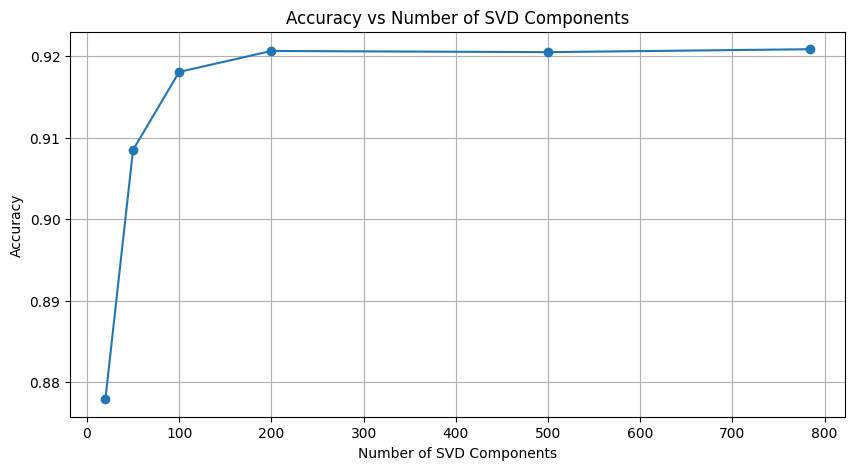

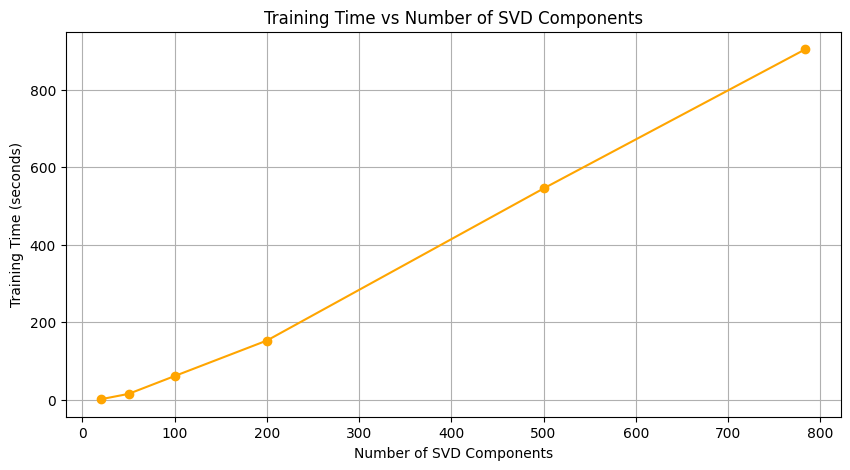

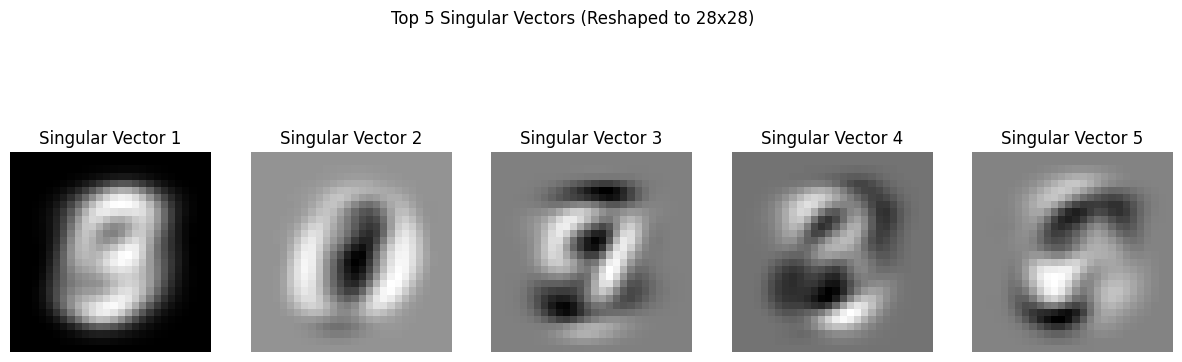

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
import matplotlib.pyplot as plt

# Extract the data for plotting
n_components_list = [result['n_components'] for result in results]
accuracy_list = [result['accuracy'] for result in results]
training_time_list = [result['training_time'] for result in results]

# Plotting Accuracy vs Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracy_list, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')
plt.grid(True)
plt.show()

# Plotting Training Time vs Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, training_time_list, marker='o', color='orange')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.grid(True)
plt.show()

_, _, Vt = np.linalg.svd(X_train, full_matrices=False)

top_5_vectors = Vt[:5, :].reshape(5, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(top_5_vectors[i], cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.suptitle('Top 5 Singular Vectors (Reshaped to 28x28)')
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

Based on the visualizations we created, we observe a significant increase in accuracy as the number of SVD components increases. However, the benefits become marginal with a higher number of components. This suggests that even though more components can slightly improve accuracy, it doesn't necessarily justify their use. I believe that using 200 components is the best choice. It achieves accuracy similar to that of 500 or 784 components but with a fraction of the runtime. Intuitively, selecting the top 200 components makes sense because much of the image consists of blank space with minimal variance. Finally, the singular vectors reveal the most common features shared among the images. We can see that the circular patterns characteristic of most numbers are prominent.